Классификация

In [17]:
from sklearn.datasets import load_iris
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [46]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

Датасет с типом Bunch - аналог словаря.

In [76]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df = df[['sepal length (cm)', 'sepal width (cm)']] 
variety = iris.target # сорт ириса идёт за целевую переменную
df['variety'] = iris.target
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
33,5.5,4.2,1.4,0.2,0
90,5.5,2.6,4.4,1.2,1
144,6.7,3.3,5.7,2.5,2
127,6.1,3.0,4.9,1.8,2
100,6.3,3.3,6.0,2.5,2


In [77]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Разделение выборки на тестовую и тренировочную

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df, variety, test_size=0.20)

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [80]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [81]:
lda.predict(X_test) # результаты прогноза

array([0, 2, 0, 0, 1, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1,
       2, 1, 0, 1, 2, 0, 1, 0])

In [82]:
result = pd.DataFrame([y_test, lda.predict(X_test), (y_test - lda.predict(X_test))]).T
result

,0,1,2
0,0,0,0
1,2,2,0
2,0,0,0
3,0,0,0
4,1,1,0
5,2,2,0
6,0,0,0
7,1,1,0
8,2,2,0
9,1,1,0


Видно, что модель ошибается и не один раз.

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.9333333333333333

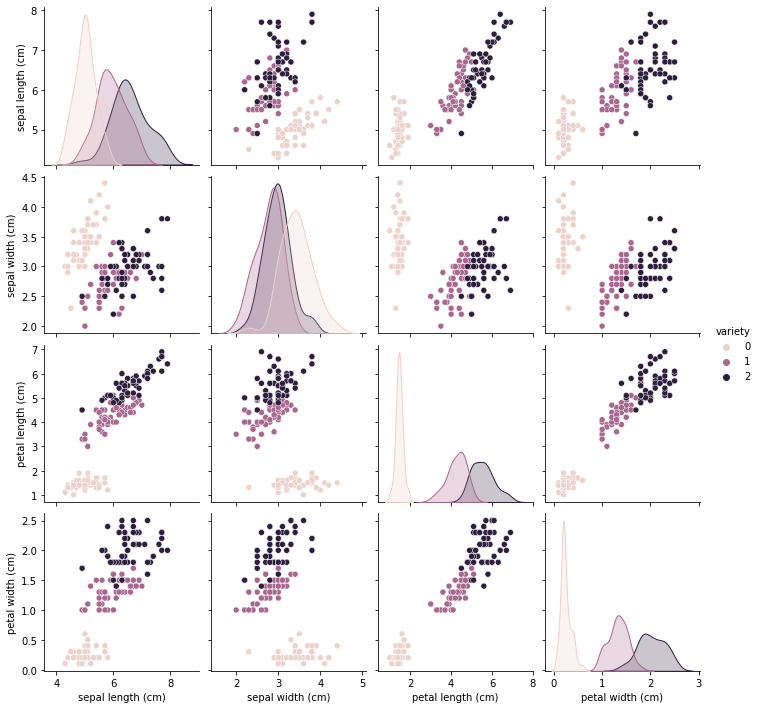

In [74]:
import seaborn as sns
sns.pairplot(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)', 'variety']], hue = 'variety')

Точки классов перемешаны между собой и можно сделать вывод о том, что выбранные признаки не подходят для классификации выборки.

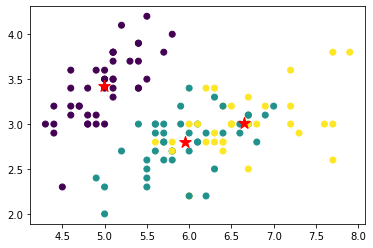

In [75]:
lda.means_ # ищем координаты центроидов 
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train) # визуализируем 
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*') # визуализируем центроиды
plt.show()

Кластеризация

In [84]:
df_1= pd.DataFrame(iris.data)
iris_df_1 = df[['sepal length (cm)', 'sepal width (cm)']]

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [86]:
iris_scaled = scaler.fit_transform(iris_df_1)

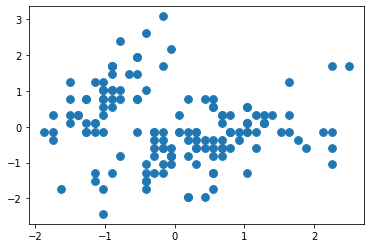

In [87]:
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1],cmap='autumn', s=60)

In [88]:
from sklearn.cluster import KMeans

Строим график "локтя"

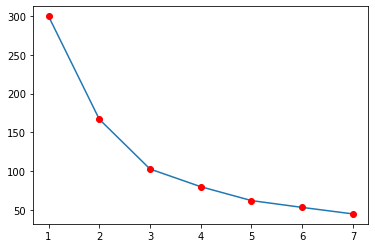

In [94]:
k_inertia = [] # список для инерции
ks = range(1, 8) # диапазон кластеров
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(iris_scaled)
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Выбираем 4 кластера

In [95]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(iris_scaled)
clusters

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 1, 0, 1, 0, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 0, 3, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2])

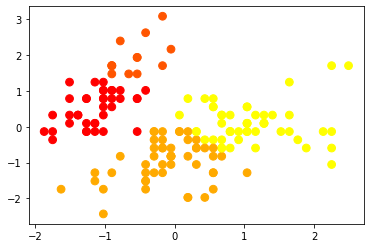

In [96]:
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1], cmap='autumn', c=clusters, s=60)